Plot histograms of MIC values for each antibiotic

In [3]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
import dotenv

from sklearn.externals import joblib

# add the 'src' directory as one where we can import modules
project_dir = os.path.join(os.getcwd(), os.pardir)
src_dir = os.path.join(project_dir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.tools

# load env
%load_ext dotenv
dotenv_path = os.path.join(project_dir, '.env')
dotenv.load_dotenv(dotenv_path)

True

In [4]:
# Load data
micsdf = joblib.load(os.path.join(os.environ.get('PRDATA'), 'interim', 'mic_class_dataframe.pkl'))
class_orders = joblib.load(os.path.join(os.environ.get('PRDATA'), 'interim', 'mic_class_order_dict.pkl'))


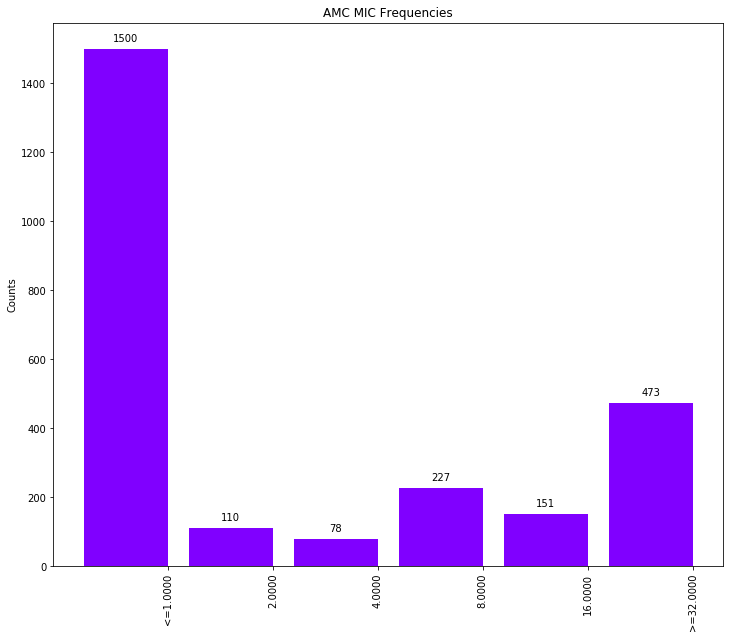

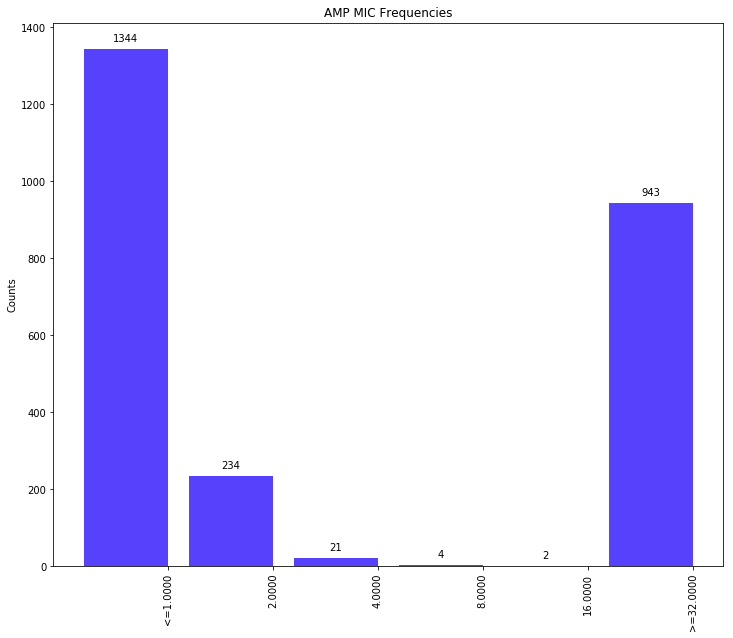

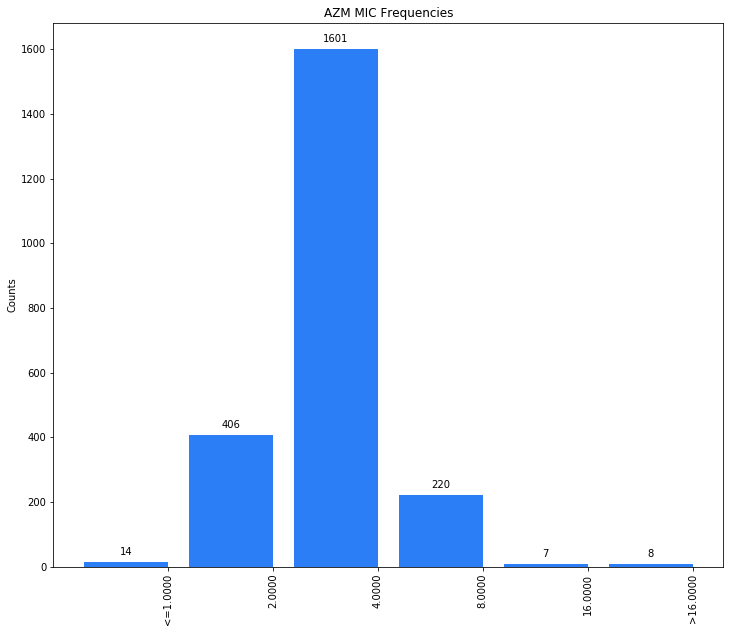

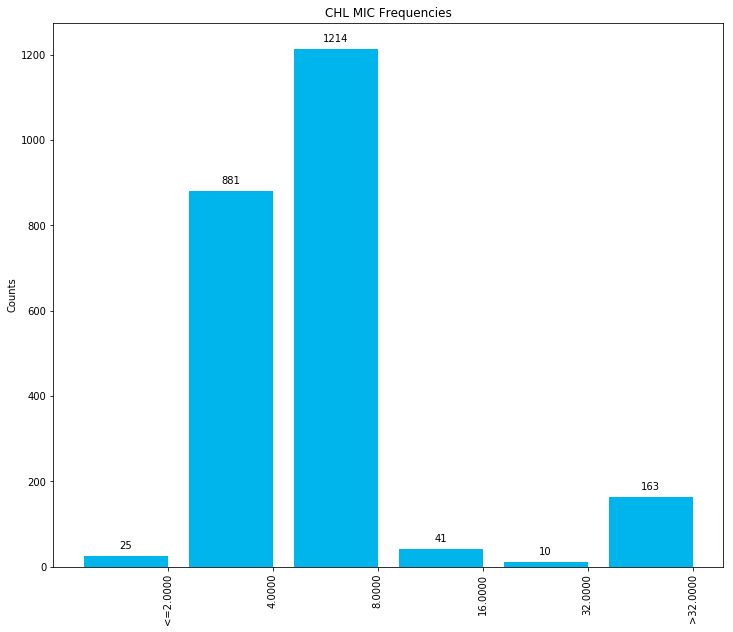

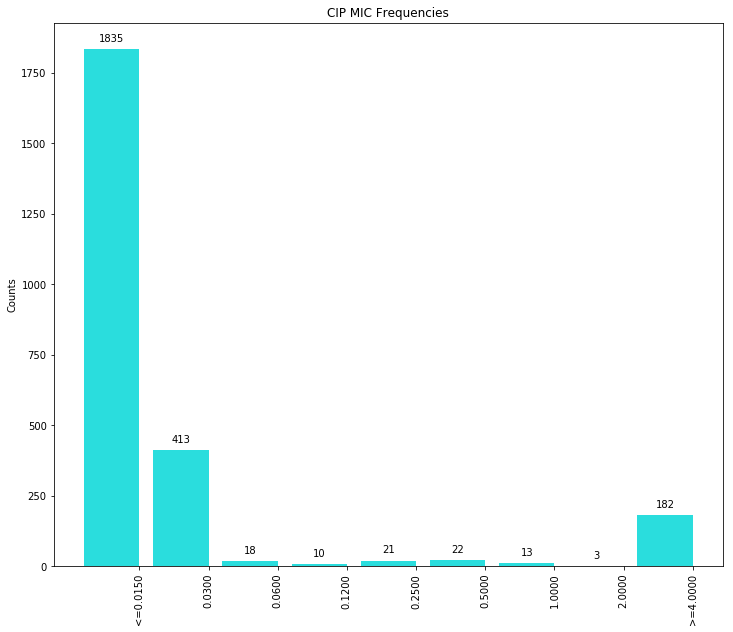

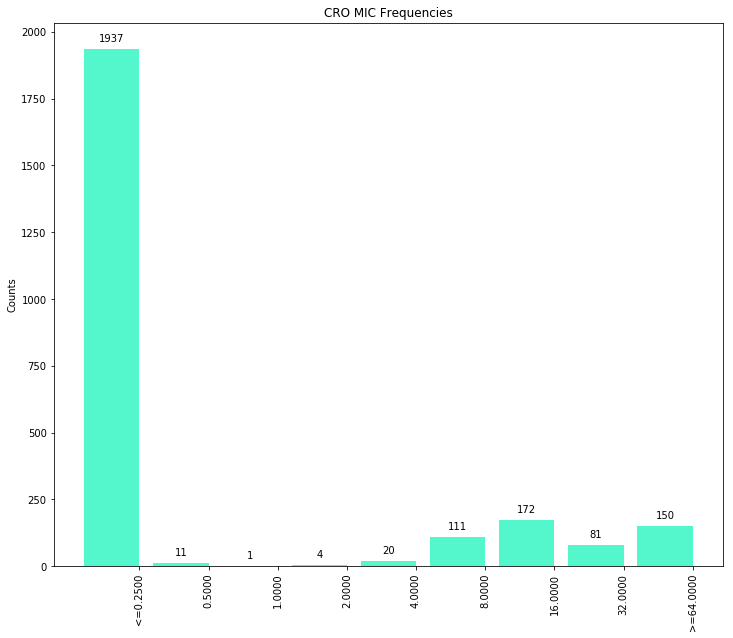

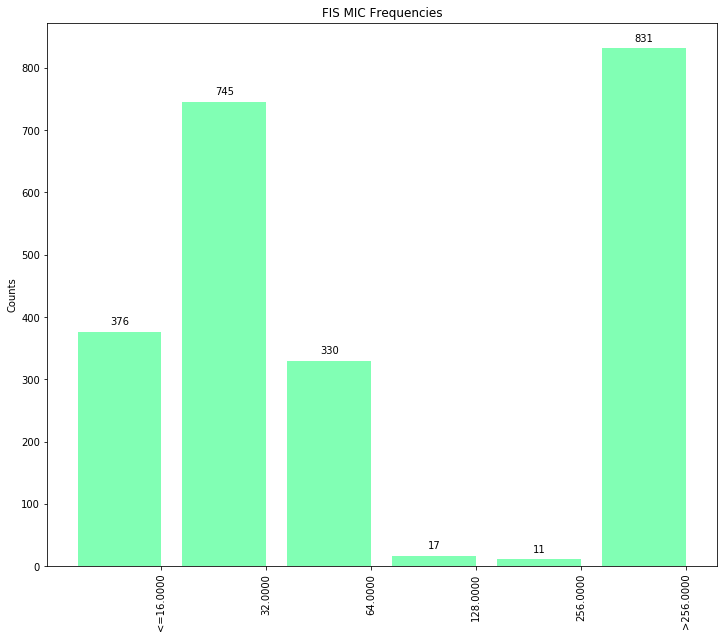

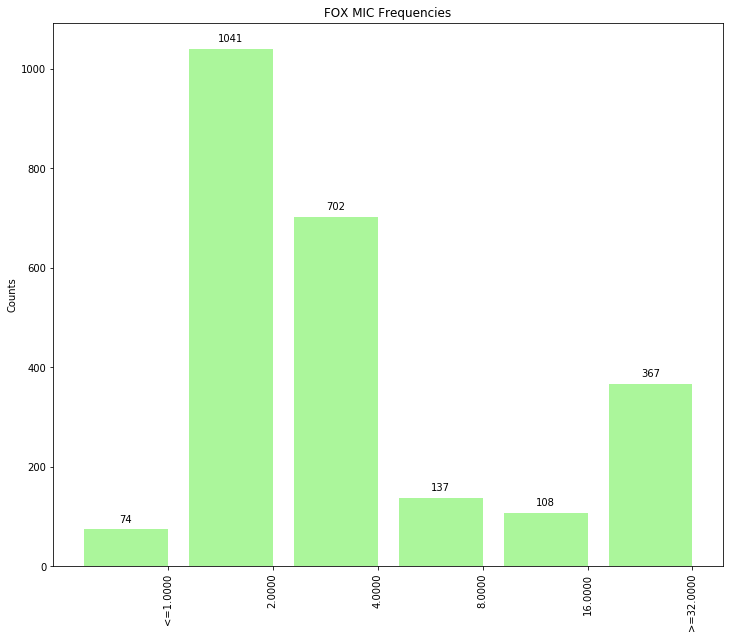

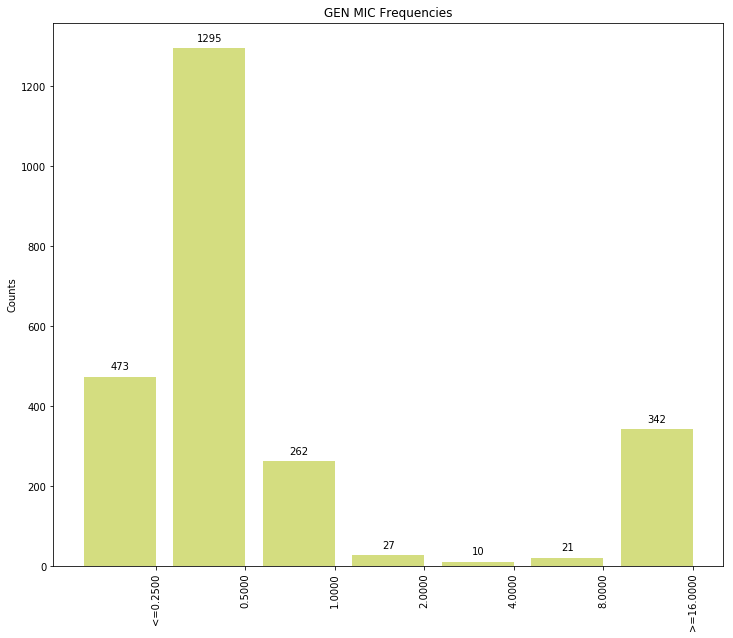

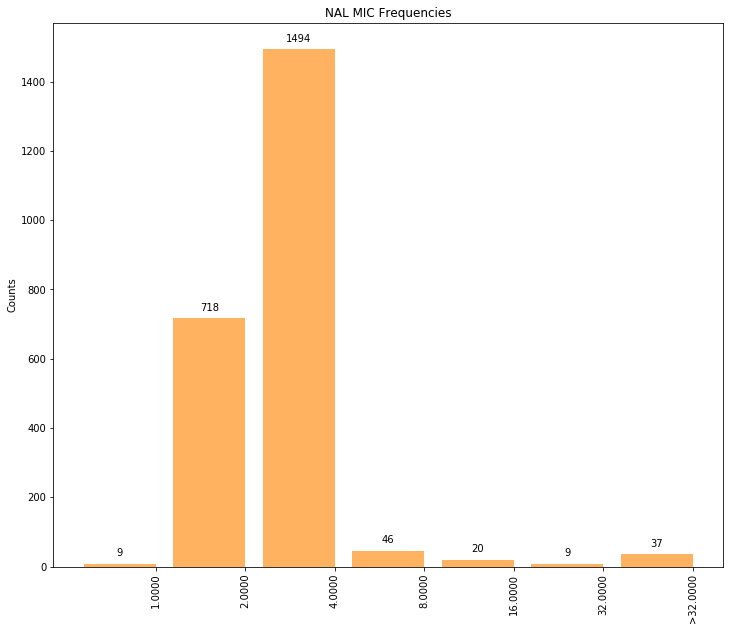

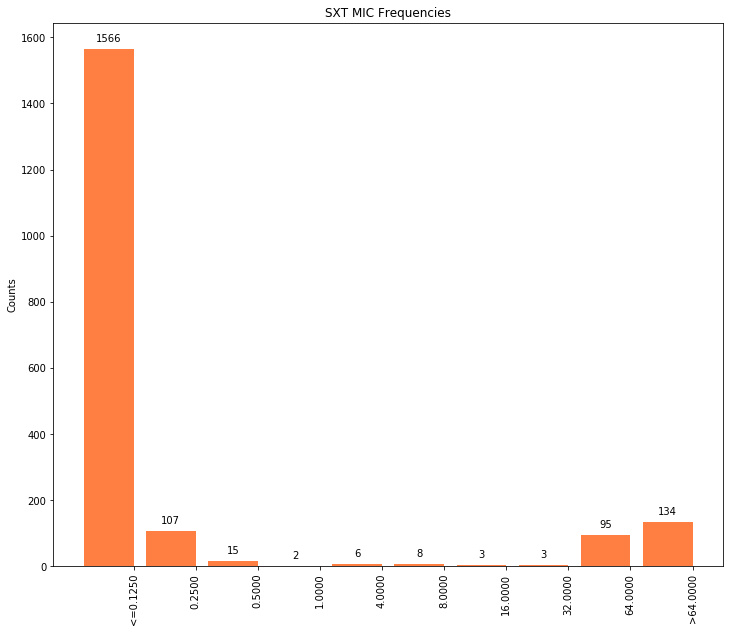

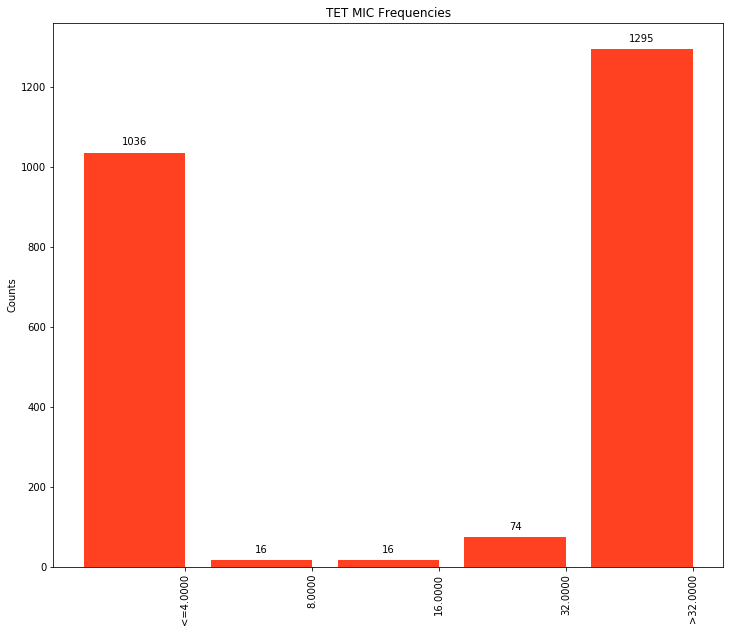

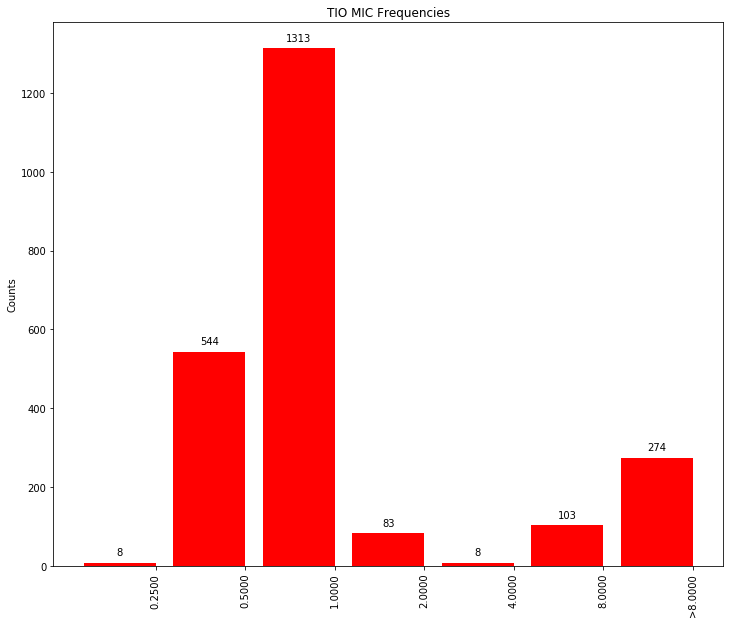

In [5]:
# MIC distributions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,10]


colors=iter(cm.rainbow(np.linspace(0,1,micsdf.shape[1])))

for col in micsdf:
    counts = micsdf[col].value_counts()[class_orders[col]]
    mics = counts.index.values
    N = len(mics)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.8       # the width of the bars

    c=next(colors)
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color=c)

    ax.set_ylabel('Counts')
    ax.set_title(col+' MIC Frequencies')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(mics)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)


    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        _, ymax = plt.ylim()
        bump = ymax * 0.01
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height + bump,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)

    plt.show()

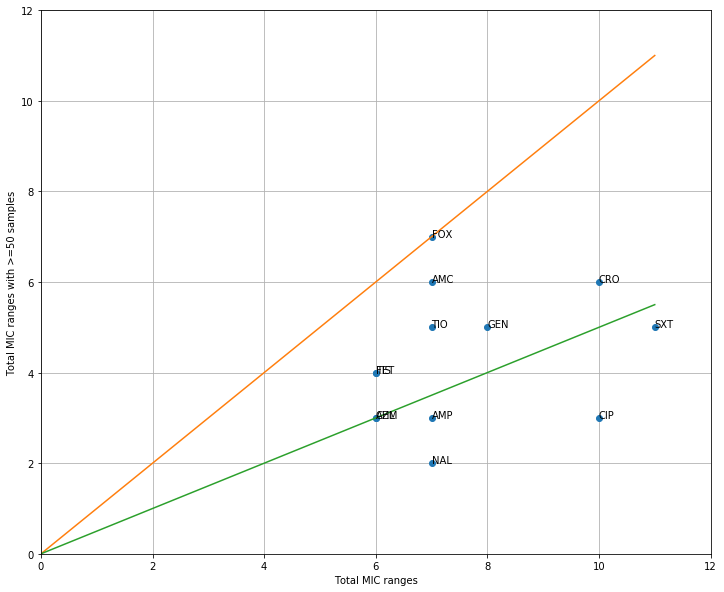

In [39]:
# Plot bins with sufficient counts
min_n = 50

colors=iter(cm.rainbow(np.linspace(0,1,micsdf.shape[1])))
ptns = np.empty((2,micsdf.shape[1]))
names = list()
i = 0

above50 = []
above75 = []
for col in micsdf:
    counts = micsdf[col].value_counts()
    M = sum(counts >= min_n)
    N = len(counts)
    ptns[:,i] = [M, N]
    names.append(col)
    if M/N >= .5:
        above50.append(col)
        if M/N >= .75:
            above75.append(col)
    i += 1
    
#ax = fig.add_subplot(111)
plt.plot(ptns[1,:], ptns[0,:], 'o')
plt.plot(np.arange(12), np.arange(12))
plt.plot(np.arange(12), np.arange(12)/2)
plt.axis([0, 12, 0, 12])
plt.grid()
plt.ylabel('Total MIC ranges with >={} samples'.format(min_n))
plt.xlabel('Total MIC ranges')

i = 0
for lab in names:  
    yx = ptns[:,i]
    plt.annotate(lab, xy=(yx[1],yx[0]), textcoords='data')
    i += 1
plt.show()

    

In [42]:
len(above50)

9

In [43]:
len(above75)

2